In [1]:
from qiskit import *
import numpy as np
#import mathplotlib.plyplot as plt
%matplotlib inline

from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [2]:
IBMQ.load_accounts()

In [3]:
nQubits = 13
s = 101 #whose bitstring is 1100101
assert s == s % (2**nQubits), "s has binary representation of length exceeding nQubits"

In [4]:
# Initialize the circuit
qr = QuantumRegister(nQubits + 1)
cr = ClassicalRegister(nQubits)
circuitName = "BernsteinVazirani"
bvCircuit = QuantumCircuit(qr, cr)

In [5]:
# Prepare the ancilla qubit
bvCircuit.x(qr[-1])
bvCircuit.h(qr[-1])

In [6]:
# Raise every qubit of the first register to the Hadamard state
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
bvCircuit.barrier()

## Create the oracle U\_f
for i in range(nQubits): <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if (binary_representation(s) AND binary_representation(s shifted left by i) <> 0): <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CNOT(qr[i], qr[-1])


In [7]:
for i in range(nQubits):
    if (s & (1 << i)):
        bvCircuit.cx(qr[i], qr[-1])
        
bvCircuit.barrier()

In [8]:
bvCircuit.h(qr[-1])
bvCircuit.x(qr[-1])

for i in range(nQubits):
    bvCircuit.h(qr[i])
bvCircuit.barrier(qr)

In [9]:
bvCircuit.measure(qr[:-1],cr)

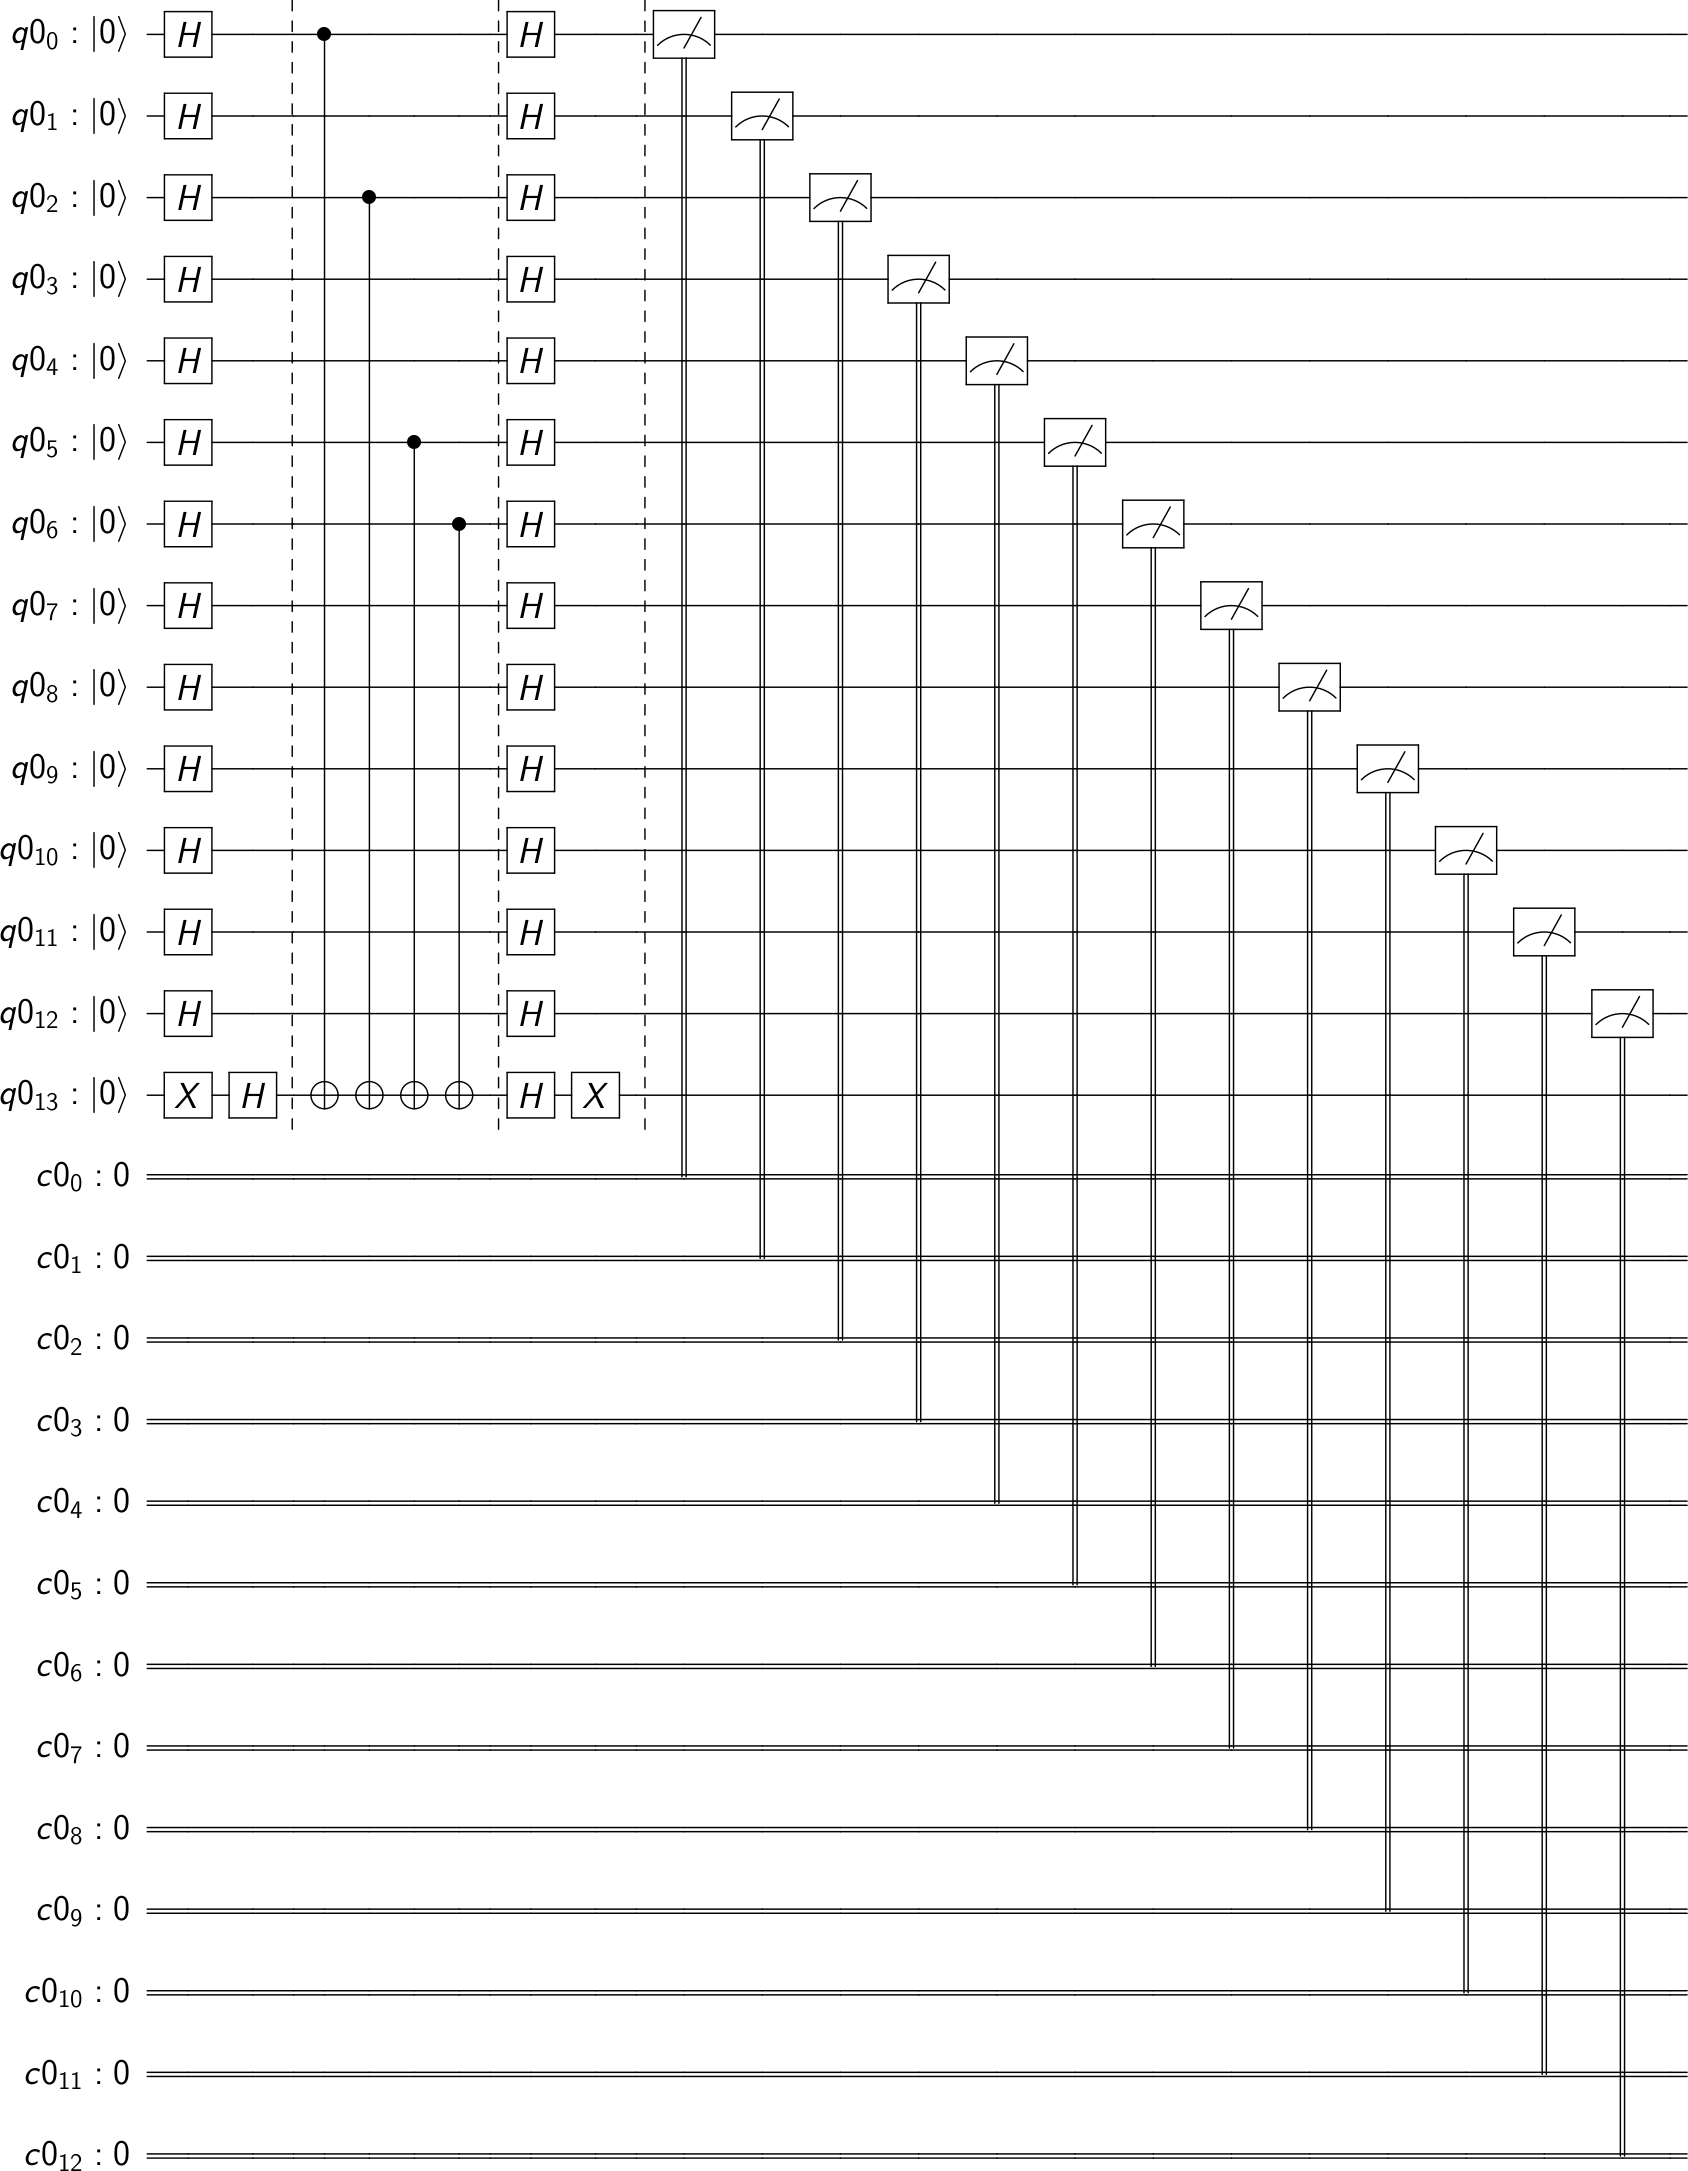

In [10]:
bvCircuit.draw(output='latex')

Job Status: job has successfully run


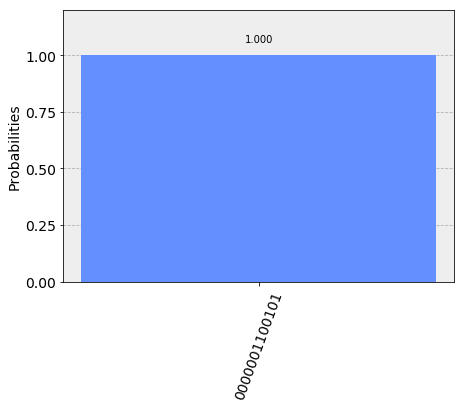

In [11]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
job = execute(bvCircuit, backend=backend, shots=shots)
job_monitor(job)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

Job Status: job has successfully run


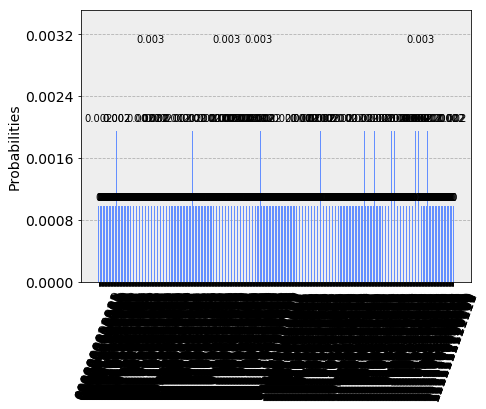

In [12]:
# use IBMQ device
backend = IBMQ.get_backend('ibmq_16_melbourne')
shots = 1024
job = execute(bvCircuit, backend=backend, shots=shots)
job_monitor(job)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

In [16]:
answer['0000001100101']

KeyError: '0000001100101'

In [3]:
def alternativeCircuit(nQubits, s):
    
    qr = QuantumRegister(nQubits)
    cr = ClassicalRegister(nQubits)
    circuitName = "BernsteinVazirani"
    bvCircuit = QuantumCircuit(qr, cr)
    
    for i in range(nQubits):
        bvCircuit.h(qr[i])
    bvCircuit.barrier()
    
    for i in range(nQubits):
        if (s & (1 << i)):
            bvCircuit.z(qr[i])
    bvCircuit.barrier()
    
    for i in range(nQubits):
        bvCircuit.h(qr[i])
    bvCircuit.barrier(qr)
    
    bvCircuit.measure(qr,cr)
    
    return bvCircuit

In [4]:
nQubits = 13
s = 101
bvCircuit_alternative = alternativeCircuit(nQubits, s)

Job Status: job has successfully run


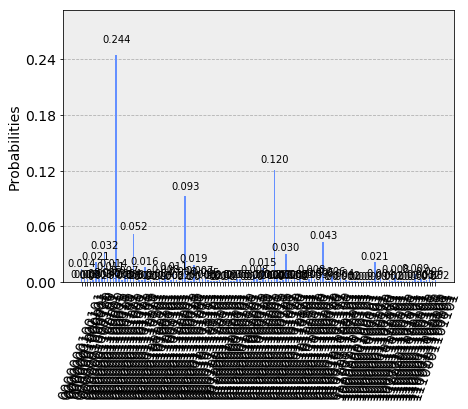

In [5]:
# use IBMQ device
backend = IBMQ.get_backend('ibmq_16_melbourne')
shots = 1024
job = execute(bvCircuit_alternative, backend=backend, shots=shots)
job_monitor(job)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

In [6]:
import operator
max(answer.items(), key=operator.itemgetter(1))

('0000001100101', 250)